In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
df = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\dataframe_classification.csv',  header=0, parse_dates=True, squeeze=True)

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,14,1,1,0,0,1,0,1
1,23.7180,26.290,578.400000,760.400000,0.004773,14,1,1,0,0,1,0,1
2,23.7300,26.230,572.666667,769.666667,0.004765,14,1,1,0,0,1,0,1
3,23.7225,26.125,493.750000,774.750000,0.004744,14,1,1,0,0,1,0,1
4,23.7540,26.200,488.600000,779.000000,0.004767,14,1,1,0,0,1,0,1


In [4]:
class_name = 'Occupancy'
columns2remove = ['Hours', 'Humidity']
df.drop(columns2remove, inplace=True, axis=1)

In [5]:
from data_preparation import prepare_dataset

In [6]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Light,CO2,HumidityRatio,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1,1,0,0,1,0,1
1,23.7180,578.400000,760.400000,0.004773,1,1,0,0,1,0,1
2,23.7300,572.666667,769.666667,0.004765,1,1,0,0,1,0,1
3,23.7225,493.750000,774.750000,0.004744,1,1,0,0,1,0,1
4,23.7540,488.600000,779.000000,0.004767,1,1,0,0,1,0,1


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
columns = ['Temperature', 'Light', 'CO2', 'HumidityRatio']
sc_X.fit(np.array(df[columns]))
df[columns] = sc_X.transform(np.array(df[columns]))

# Data Partitioning

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [9]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [10]:
X_train.shape

(14392, 10)

In [11]:
np.sqrt(71)

8.426149773176359

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9925421530479897
F1-score [0.99514461 0.98392732]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4743
           1       0.98      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [14]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.9964066793489749,
  'recall': 0.9938857263335442,
  'f1-score': 0.9951446062909014,
  'support': 4743},
 '1': {'precision': 0.9798190675017397,
  'recall': 0.9880701754385965,
  'f1-score': 0.983927323549965,
  'support': 1425},
 'accuracy': 0.9925421530479897,
 'macro avg': {'precision': 0.9881128734253573,
  'recall': 0.9909779508860703,
  'f1-score': 0.9895359649204332,
  'support': 6168},
 'weighted avg': {'precision': 0.9925744246663696,
  'recall': 0.9925421530479897,
  'f1-score': 0.9925530648016286,
  'support': 6168}}

In [15]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.9964066793489749, "recall": 0.9938857263335442, "f1-score": 0.9951446062909014, "support": 4743}, "1": {"precision": 0.9798190675017397, "recall": 0.9880701754385965, "f1-score": 0.983927323549965, "support": 1425}, "accuracy": 0.9925421530479897, "macro avg": {"precision": 0.9881128734253573, "recall": 0.9909779508860703, "f1-score": 0.9895359649204332, "support": 6168}, "weighted avg": {"precision": 0.9925744246663696, "recall": 0.9925421530479897, "f1-score": 0.9925530648016286, "support": 6168}}'

In [16]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'0': {'precision': 0.9964066793489749,
  'recall': 0.9938857263335442,
  'f1-score': 0.9951446062909014,
  'support': 4743},
 '1': {'precision': 0.9798190675017397,
  'recall': 0.9880701754385965,
  'f1-score': 0.983927323549965,
  'support': 1425},
 'accuracy': 0.9925421530479897,
 'macro avg': {'precision': 0.9881128734253573,
  'recall': 0.9909779508860703,
  'f1-score': 0.9895359649204332,
  'support': 6168},
 'weighted avg': {'precision': 0.9925744246663696,
  'recall': 0.9925421530479897,
  'f1-score': 0.9925530648016286,
  'support': 6168}}

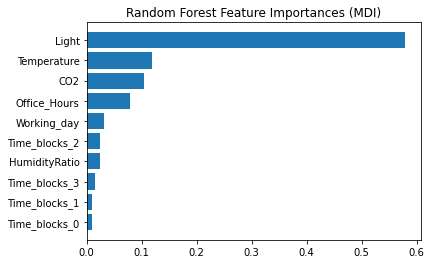

In [17]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [18]:
from sklearn.inspection import permutation_importance

In [19]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

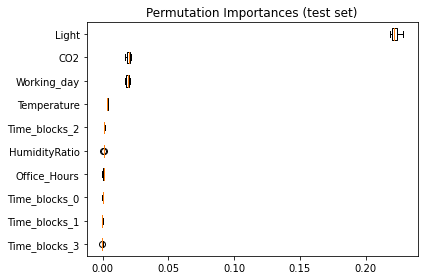

In [21]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [22]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [25]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Asia/Anaconda3/Library/bin/graphviz'

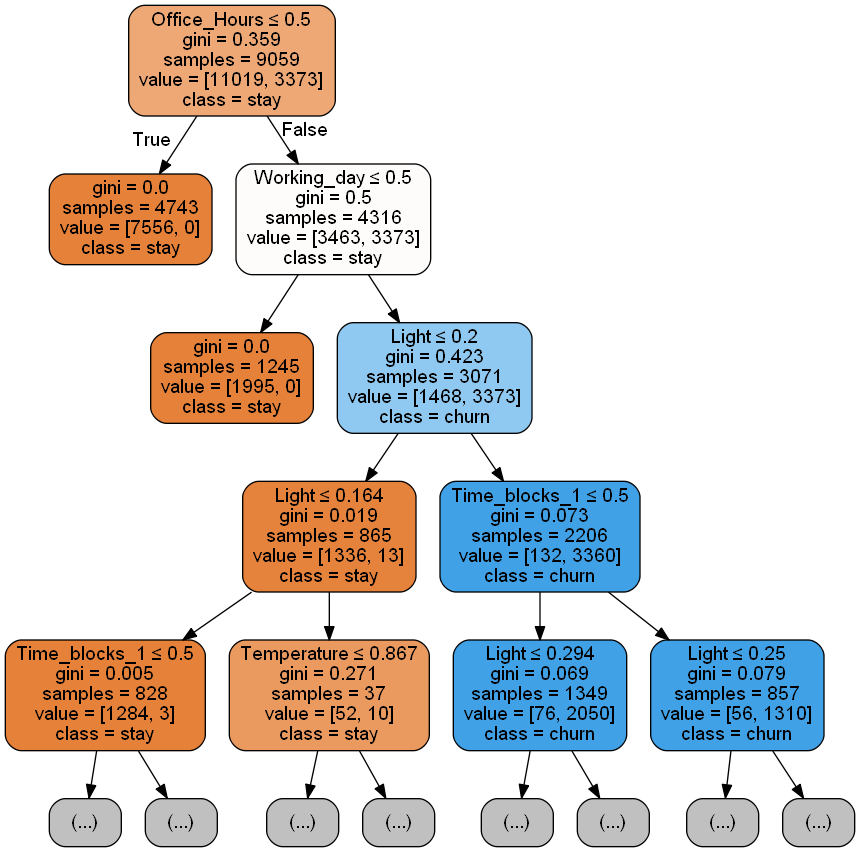

In [26]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

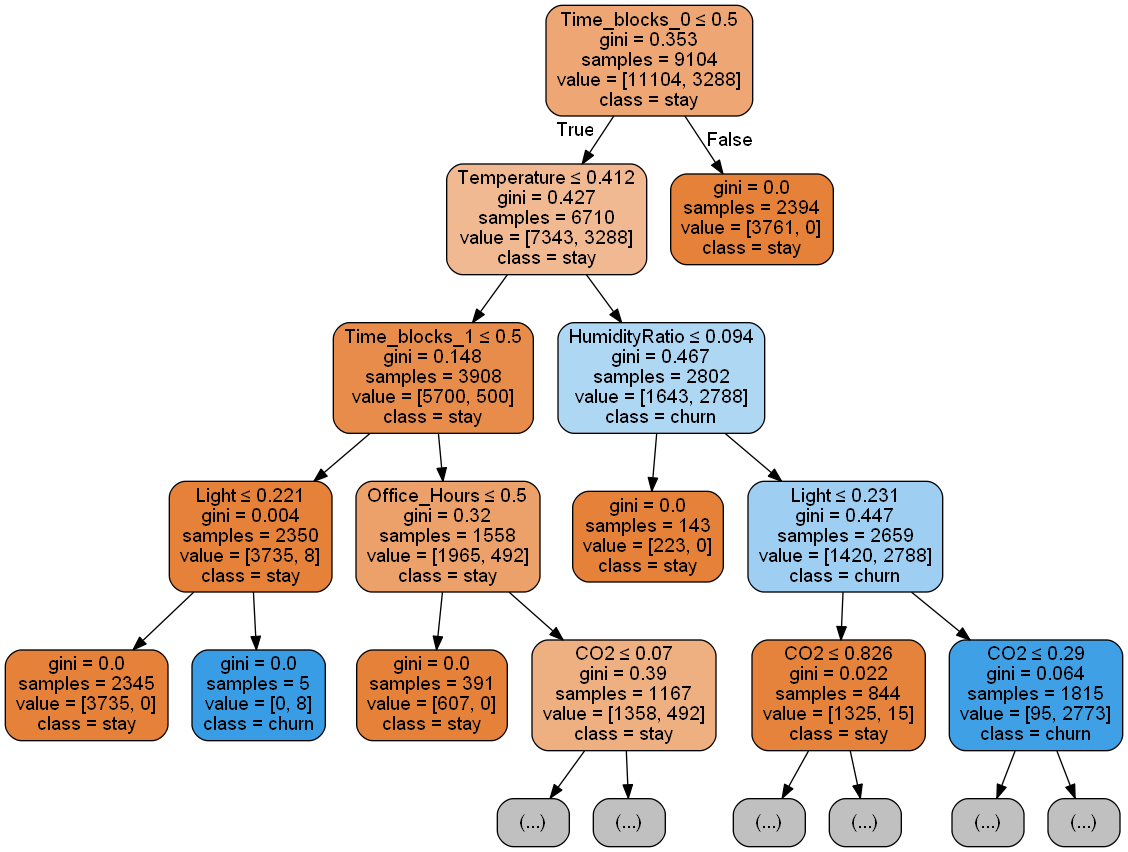

In [27]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [28]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.992704280155642
F1-score [0.99524966 0.98428222]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4743
           1       0.98      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [29]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9925421530479897
F1-score [0.99514461 0.98392732]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4743
           1       0.98      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [30]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9902723735408561
F1-score [0.99364811 0.97923875]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



### Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

In [33]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.955 +/- 0.042


### Tuning the hyper-parameters

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [37]:
param_list = {'min_samples_split': [2, 5, 10, 20,30,50,100],
              'min_samples_leaf': [1, 5, 10, 20, 30,50, 100], 'max_depth'= [None] + list(np.arange(2, 20))}

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

SyntaxError: invalid syntax (<ipython-input-37-519fc03d5fe8>, line 3)

In [38]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.939
F1-score [0.96539989 0.74261603]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.96      0.61      0.74       145

    accuracy                           0.94      1000
   macro avg       0.95      0.80      0.85      1000
weighted avg       0.94      0.94      0.93      1000



In [39]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 30, 'min_samples_leaf': 30, 'max_depth': 4}

# Bagging

In [40]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [41]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.942
F1-score [0.96670494 0.7751938 ]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.88      0.69      0.78       145

    accuracy                           0.94      1000
   macro avg       0.92      0.84      0.87      1000
weighted avg       0.94      0.94      0.94      1000



In [42]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.895
F1-score [0.94169906 0.47236181]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       855
           1       0.87      0.32      0.47       145

    accuracy                           0.90      1000
   macro avg       0.88      0.66      0.71      1000
weighted avg       0.89      0.90      0.87      1000



In [43]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.94
F1-score [0.96598639 0.74576271]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.97      0.61      0.75       145

    accuracy                           0.94      1000
   macro avg       0.95      0.80      0.86      1000
weighted avg       0.94      0.94      0.93      1000



# Boosting

In [44]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [45]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.874
F1-score [0.92857143 0.46610169]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       855
           1       0.60      0.38      0.47       145

    accuracy                           0.87      1000
   macro avg       0.75      0.67      0.70      1000
weighted avg       0.86      0.87      0.86      1000



In [46]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.941
F1-score [0.96649631 0.75313808]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.96      0.62      0.75       145

    accuracy                           0.94      1000
   macro avg       0.95      0.81      0.86      1000
weighted avg       0.94      0.94      0.94      1000

